Downloading...
From: https://drive.google.com/uc?id=16BzQgpm0KAQhXuYm3Zmie4Nm9qAW9j7s
To: /content/crying_audio.wav
100%|██████████| 5.69k/5.69k [00:00<00:00, 11.8MB/s]


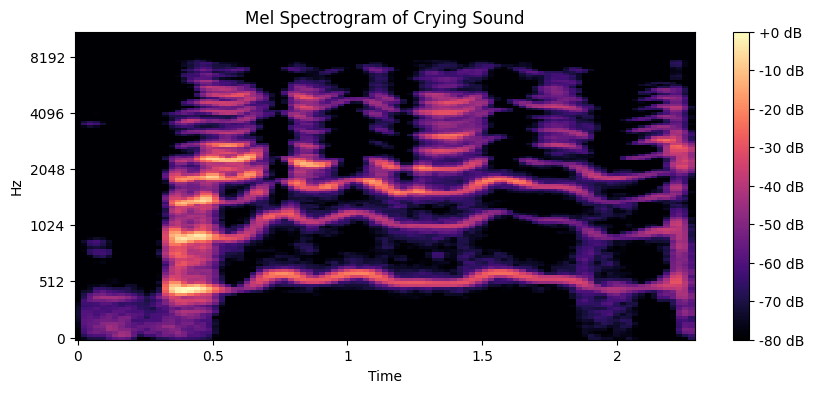

In [ ]:
# Step 1: Install required libraries
!pip install noisereduce
!pip install gdown

# Step 2: Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import noisereduce as nr
import gdown

# Step 3: Download audio file from Google Drive
file_id = "16BzQgpm0KAQhXuYm3Zmie4Nm9qAW9j7s"
output = "crying_audio.wav"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Step 4: Preprocess audio
def preprocess_audio(audio_path, sr=22050):
    y, sr = librosa.load(audio_path, sr=sr)
    y = nr.reduce_noise(y=y, sr=sr)

    y, _ = librosa.effects.trim(y)

    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db

# Step 5: Process and visualize
spectrogram = preprocess_audio(output)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=22050, hop_length=512, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram of Crying Sound")
plt.show()













In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import files
import librosa
import numpy as np

def detect_cry_from_uploaded_file(model):
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    # Preprocess the uploaded file
    mel_spec = preprocess_audio(file_name)

    # Ensure the spectrogram is resized/padded to 128x128 if needed
    mel_spec_resized = librosa.util.fix_length(mel_spec, size=128, axis=1)
    mel_spec_resized = mel_spec_resized[:128, :]  # Crop to 128x128 max

    # Prepare input for CNN
    mel_spec_input = np.expand_dims(mel_spec_resized, axis=-1)  # Add channel
    mel_spec_input = np.expand_dims(mel_spec_input, axis=0)     # Add batch

    # Predict
    prediction = model.predict(mel_spec_input)[0][0]

    if prediction > 0.5:
        print("🔴 Crying Detected!")
    else:
        print("🟢 No Crying Detected.")

# Run this function to upload and detect
detect_cry_from_uploaded_file(cnn_model)
